In [ ]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [ ]:
# 1 LOADING THE DATA
sales_csv_path = 'sales_info.csv'

csv_rows = []

with open(sales_csv_path, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        csv_rows.append(row)
    f.close()

print(np.transpose(csv_rows[:4]))


In [ ]:
# 2 SEPARATE HEADER AND DATA
header = csv_rows[0]
data = csv_rows[1:]

print(header)
print(data[:3])


In [ ]:
# 3 Create a dictionary with the data
sales_data = { k:v for k, v in zip(header, np.transpose(data))}
print(sales_data['volume_sold'][:10])

In [ ]:
# 4 Convert data from string to float
sales_data_modified = {k:[float(f) for f in v] for k, v in sales_data.iteritems()}
pprint(sales_data_modified)

In [ ]:
# 5 Write function to print summary statistics
def summary_stats(col_name, col_data):
    print("Column header: " + str(col_name))
    print("Mean: " + str(np.mean(col_data)))
    print("Median: " + str(np.median(col_data)))
    print("Mode: " + str(stats.mode(np.around(col_data))))
    print("Variance: " + str(np.var(col_data)))
    print("Standard Deviation: " + str(np.std(col_data)))
    
summary_stats('volume_sold', sales_data_modified['volume_sold'])
print('\n')
summary_stats('2015_margin', sales_data_modified['2015_margin'])
print('\n')
summary_stats('2015_q1_sales', sales_data_modified['2015_q1_sales'])
print('\n')
summary_stats('2016_q1_sales', sales_data_modified['2016_q1_sales'])

In [45]:
# 6 Plot the distributions
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

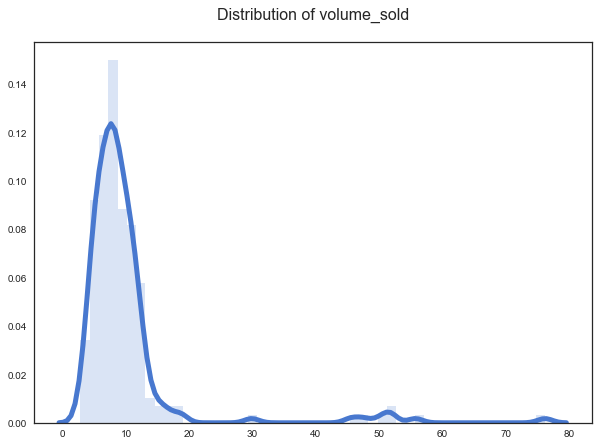

In [46]:
# volume sold
distribution_plotter('volume_sold', sales_data_modified)

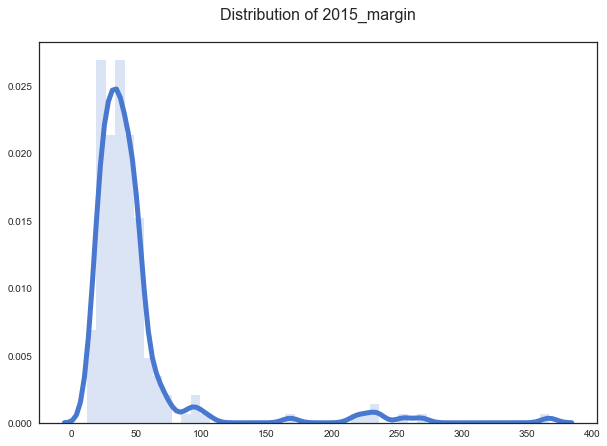

In [47]:
# 2015 margin
distribution_plotter('2015_margin', sales_data_modified)

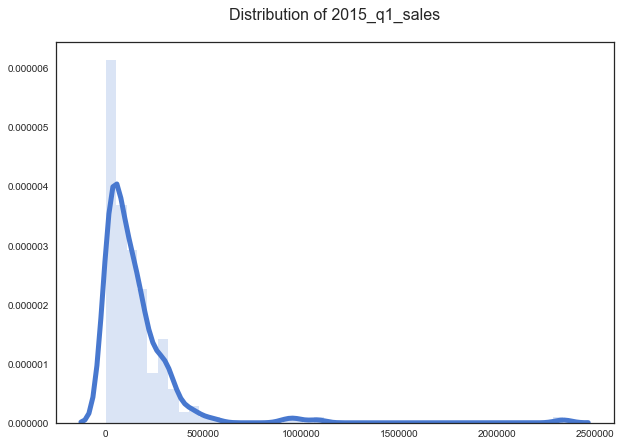

In [48]:
# 2015 q1 sales
distribution_plotter('2015_q1_sales', sales_data_modified)

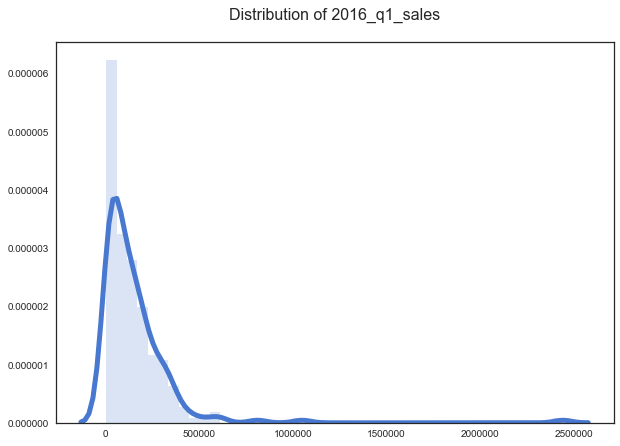

In [49]:
# 2016 q1 sales
distribution_plotter('2016_q1_sales', sales_data_modified)